# Applied Data Science with Python: Course-End Project
<b>Author: Arif Qasim <br><br>
  <b>Objective:<b> Analyze the sales data for AAL Q4 2020 to provide insights on performance.

First must import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Data Wrangling
<b>In this section we will load in the data, inspect it, and clean it up to prepare it for analysis.<b>

1. Load in the data from the csv into the pandas dataframe.

In [15]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

2. Let's look at the first few rows, data types, and basic information.

In [16]:
print("First and last 5 rows of the dataset:")
display(df)
print("\nDataset Information:")
df.info()

First and last 5 rows of the dataset:


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


<b>Observations:</b><br>
   &nbsp;&nbsp; a. The `Date` column should be converted to datetime<br>
   &nbsp;&nbsp; b. `Time`, `State`, and `Group` are categorical data, so object is fine dtype<br>
   &nbsp;&nbsp; c. `Unit` and `Sales` are numerical so int64 works <br>
   &nbsp;&nbsp; d. Looks like no missing values based on `df.info()`<br>

3a.  Just confirming observations of missinging values, non-missing values, and duplicate values in the dataframe.

In [17]:
print("Checking for missing values:")
print(df.isna().sum())
print("\nChecking for non-missing values:")
print(df.notna().sum())
print("\nChecking for duplicates:")
print(df.duplicated().sum())

Checking for missing values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Checking for non-missing values:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

Checking for duplicates:
0


Output shows no missing values or duplicates, so all good.

3b. Recommendations for Treating Missing Data (If Any Found)<br>
 - Missing Data: Although there was no missing data in this dataset, if there was:
For columns like `Unit` or `Sales`, we could replace values using the mean, median, or mode, depending on which is best fit.
   - For columns like `Time`, `State`, or `Group`, we could replace with the mode or create a new category like 'Unknown'.
   - If the number of missing rows is very small, dropping the rows could work, especially if there is not pattern.
- Incorrect Data: This requires going through the data and knowing about it. For example:
  - Check if `Sales` equals `Unit` * `Price`
  - Check for invalid entries into text columns
  - Validate the date ranges


4. Make sure Time Column is clean and convert Date to Datetime dtype

In [18]:
# Clean potential inconsistencies in categorical columns (whitespace)
categorical_cols = ['Time', 'State', 'Group']
for col in categorical_cols:
    if df[col].dtype == 'object': # Apply only to object columns
        df[col] = df[col].str.strip() # Remove leading/trailing whitespace

# Ensure consistent capitalization for 'Time'
df['Time'] = df['Time'].str.title()
print("\nUnique values in 'Time' column after cleaning:")
print(df['Time'].unique())

df['Date'] = pd.to_datetime(df['Date'])
print("\nData types after converting 'Date' column:")
print(df.dtypes)


Unique values in 'Time' column after cleaning:
['Morning' 'Afternoon' 'Evening']

Data types after converting 'Date' column:
Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object


5.  Data normalization: We will normalize the `Unit` and `Sales` columns using min max scaler. <br>
Normalization scales numerical features to a range, in this case [0, 1]. This is useful when features of data have different ranges and we want them to contribute equally

In [19]:
scaler = MinMaxScaler()
numerical_cols = ['Unit', 'Sales']
df_normalized = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\nFirst 5 rows with normalized 'Unit' and 'Sales':")
print(df_normalized.head())

print("\nOriginal Data Description:")
print(df[numerical_cols].describe())

print("\nNormalized Data Description:")
print(df_normalized[numerical_cols].describe())


First 5 rows with normalized 'Unit' and 'Sales':
        Date       Time State    Group      Unit     Sales
0 2020-10-01    Morning    WA     Kids  0.095238  0.095238
1 2020-10-01    Morning    WA      Men  0.095238  0.095238
2 2020-10-01    Morning    WA    Women  0.031746  0.031746
3 2020-10-01    Morning    WA  Seniors  0.206349  0.206349
4 2020-10-01  Afternoon    WA     Kids  0.015873  0.015873

Original Data Description:
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000

Normalized Data Description:
              Unit        Sales
count  7560.000000  7560.000000
mean      0.254054     0.254054
std       0.204784     0.204784
min       0.000000     0.000000
25%       0.095238     0.095238
50%       0.190476     0.190476
75%     

6. The `GroupBy()` function is very useful for segmenting data and performing calculations on those segments. There are two main uses:
 - Data Chunking: We can use `GroupBy()` to "chunk" the data by `State`, `Group`, `Time`. For example, `df.groupby('State')` creates groups for each state
 - Merging: After grouping, typical functions used are like `sum()`, `mean()`, `count()`, `median()`, and these are used to summarize data within each chunk. For example, `df.groupby('State')['Sales'].sum()` calculates the total sales for each state.

## Data Analysis
<b>Now that the data has been cleaned up and is ready for analysis, we can start to look at some basic statistics and visualizations. This will help us understand the distribution of our data and identify any outliers or anomalies.

1. Descriptive Statistical Analysis with visualization

In [7]:
desc_stats = df[['Unit', 'Sales']].agg(['mean', 'median', 'std'])
# modes for 'Unit' and 'Sales' can return multiple values if there are ties, so will add seperately
unit_mode = df['Unit'].mode().tolist()
sales_mode = df['Sales'].mode().tolist()
desc_stats.loc['mode'] = [', '.join(map(str, unit_mode)), ', '.join(map(str, sales_mode))]
print("Descriptive Statistics for 'Unit' and 'Sales':")
print(desc_stats)

Descriptive Statistics for 'Unit' and 'Sales':
             Unit         Sales
mean    18.005423  45013.558201
median       14.0       35000.0
std     12.901403  32253.506944
mode            9         22500


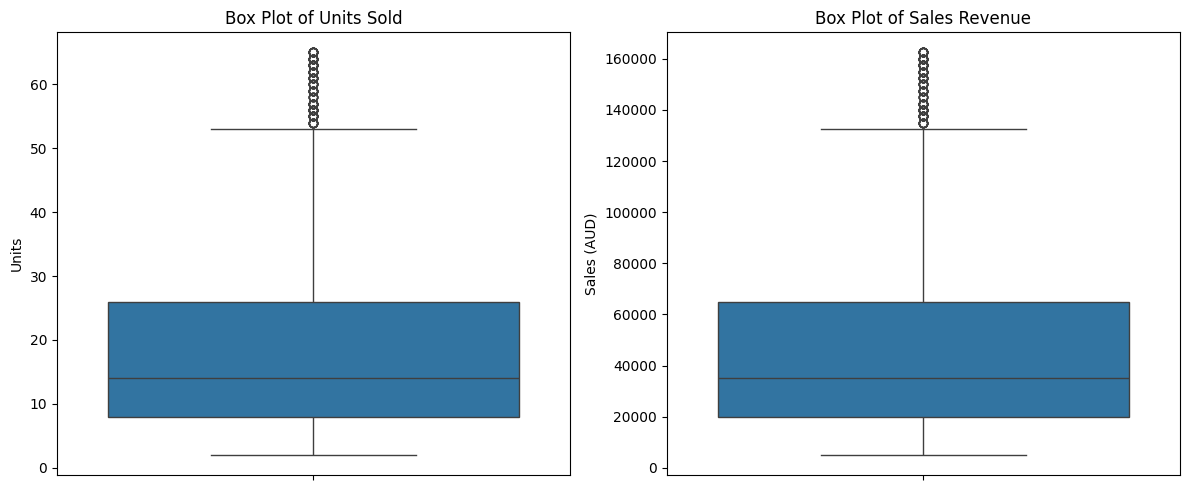

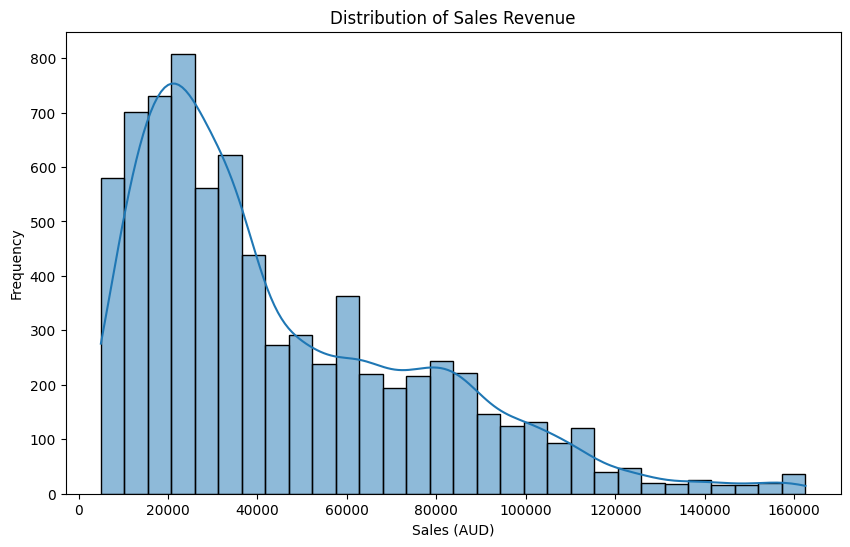

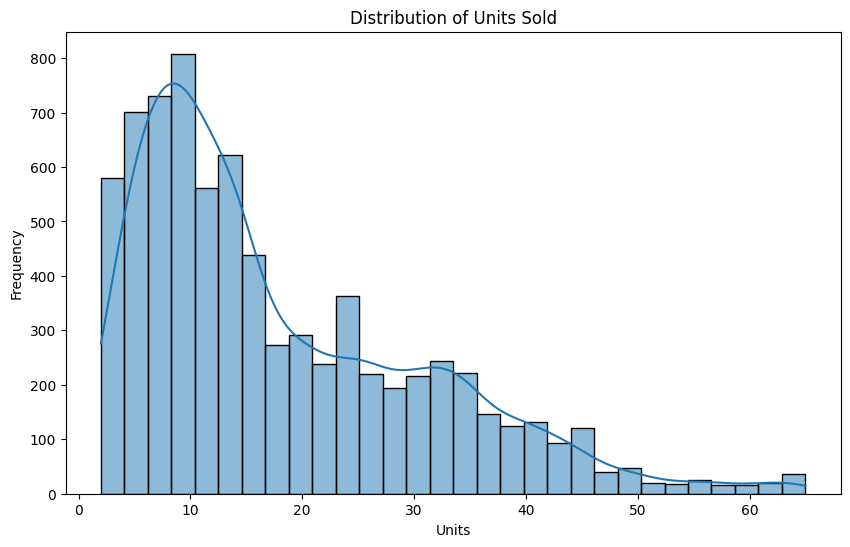

In [8]:
# Box plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Unit'])
plt.title('Box Plot of Units Sold')
plt.ylabel('Units')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Sales'])
plt.title('Box Plot of Sales Revenue')
plt.ylabel('Sales (AUD)')
plt.tight_layout()
plt.show()
# Distribution plot Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales Revenue')
plt.xlabel('Sales (AUD)')
plt.ylabel('Frequency')
plt.show()
# Distribution plot Units
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit'], kde=True, bins=30)
plt.title('Distribution of Units Sold')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()

2. Identify the groups with highest and lowest sales

Total Sales per Demographic Group:
Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

Group with Highest Total Sales: Men (AUD 85,750,000)
Group with Lowest Total Sales: Seniors (AUD 84,037,500)


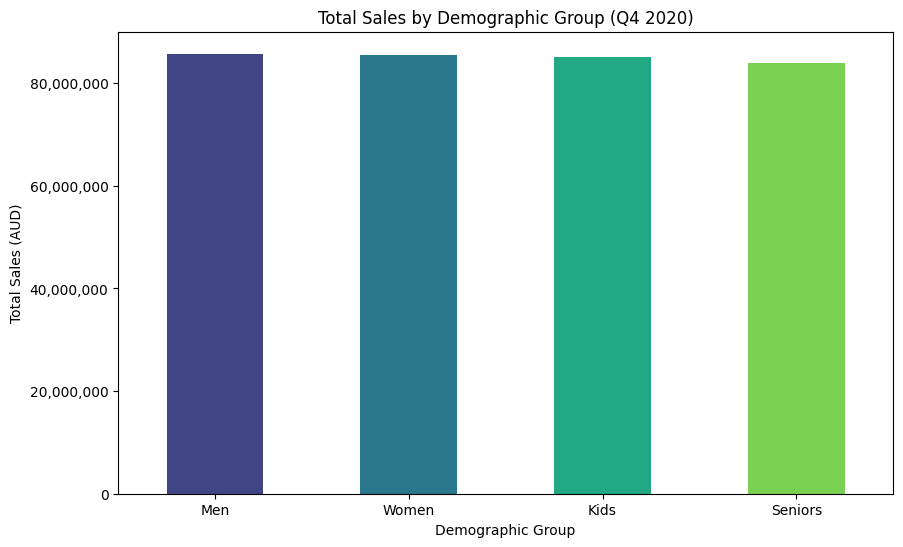

In [9]:
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

print("Total Sales per Demographic Group:")
print(group_sales)

highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

print(f"\nGroup with Highest Total Sales: {highest_sales_group} (AUD {group_sales.max():,.0f})")
print(f"Group with Lowest Total Sales: {lowest_sales_group} (AUD {group_sales.min():,.0f})")

# Visualization
plt.figure(figsize=(10, 6))
group_sales.plot(kind='bar', color=sns.color_palette("viridis", len(group_sales)))
plt.title('Total Sales by Demographic Group (Q4 2020)')
plt.xlabel('Demographic Group')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y') # Avoid scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()


<b>Thus we can see:</b> The group with Highest Total Sales was Men (AUD 85,750,000) and the group with Lowest Total Sales was Seniors (AUD 84,037,500)

3. Identify the States with the highest and lowest sales

Total Sales per State:
State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

State with Highest Total Sales: VIC (AUD 105,565,000)
State with Lowest Total Sales: WA (AUD 22,152,500)


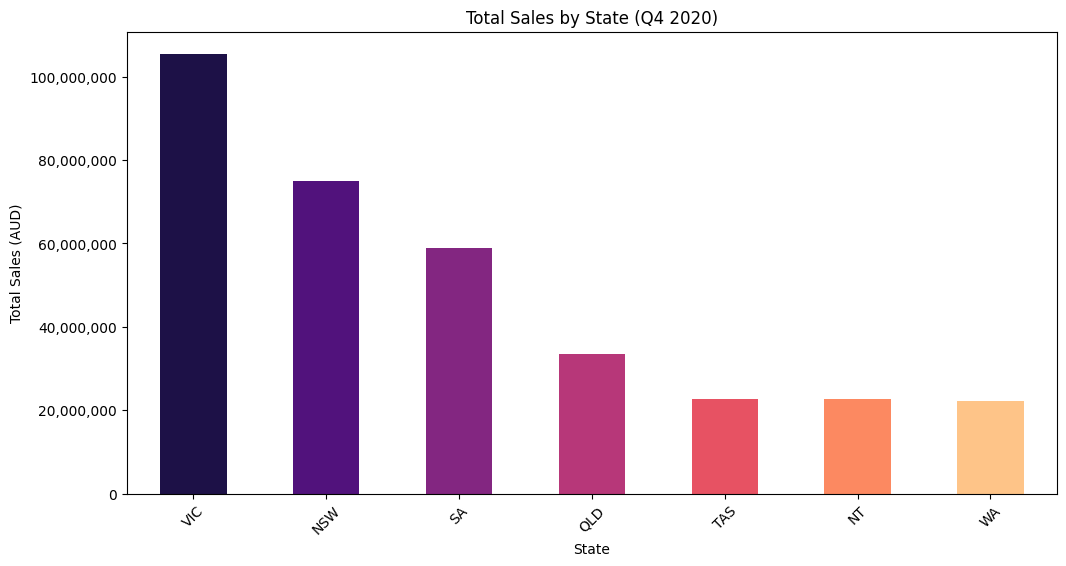

In [10]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

print("Total Sales per State:")
print(state_sales)

highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()

print(f"\nState with Highest Total Sales: {highest_sales_state} (AUD {state_sales.max():,.0f})")
print(f"State with Lowest Total Sales: {lowest_sales_state} (AUD {state_sales.min():,.0f})")

# Visualization
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color=sns.color_palette("magma", len(state_sales)))
plt.title('Total Sales by State (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()


<b>Thus we can see:</b> The State with the Highest Total Sales is Victoria (AUD 105,565,000) and the state with Lowest Total Sales is Western Australia (AUD 22,152,500).

4. Generate weekly, monthly, and quarterly reports


--- Quarterly Sales Report (Q4 2020) ---
Total Sales: AUD 340,302,500

--- Monthly Sales Report (Q4 2020) ---
Date
2020-10 (October)     114290000
2020-11 (November)     90682500
2020-12 (December)    135330000
Name: Sales, dtype: int64

--- Weekly Sales Report (Q4 2020) ---
Date
2020-10-05 (Week Starting)    18907500
2020-10-12 (Week Starting)    26935000
2020-10-19 (Week Starting)    26805000
2020-10-26 (Week Starting)    26590000
2020-11-02 (Week Starting)    20797500
2020-11-09 (Week Starting)    21065000
2020-11-16 (Week Starting)    21242500
2020-11-23 (Week Starting)    21187500
2020-11-30 (Week Starting)    21442500
2020-12-07 (Week Starting)    30817500
2020-12-14 (Week Starting)    32060000
2020-12-21 (Week Starting)    31247500
2020-12-28 (Week Starting)    32007500
2021-01-04 (Week Starting)     9197500
Name: Sales, dtype: int64


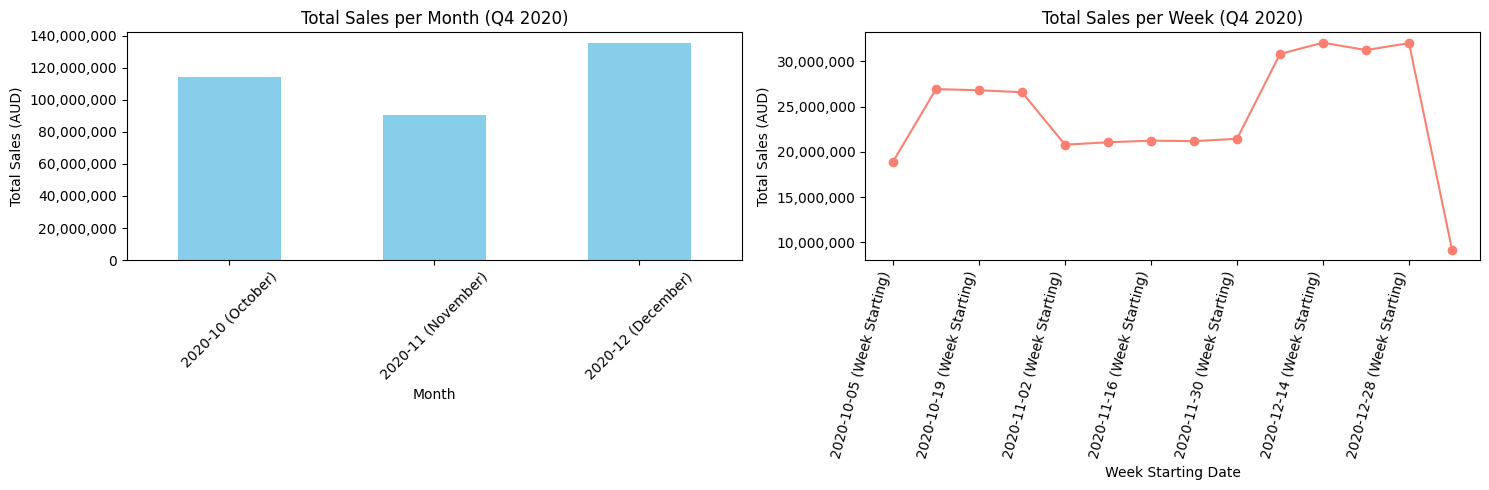

In [14]:
# Ensure Date is the index for time-based resampling
df_time_indexed = df.set_index('Date')

# Quarterly Report
quarterly_sales = df['Sales'].sum()
print(f"\n--- Quarterly Sales Report (Q4 2020) ---")
print(f"Total Sales: AUD {quarterly_sales:,.0f}")

# Monthly Report
monthly_sales = df_time_indexed.resample('ME')['Sales'].sum()
# Rename index for clarity
monthly_sales.index = monthly_sales.index.strftime('%Y-%m (%B)')
print("\n--- Monthly Sales Report (Q4 2020) ---")
print(monthly_sales)

# Weekly Report
# Using 'W-Mon' to define weeks starting on Monday
weekly_sales = df_time_indexed.resample('W-Mon')['Sales'].sum()
# Rename index for clarity
weekly_sales.index = weekly_sales.index.strftime('%Y-%m-%d (Week Starting)')
print("\n--- Weekly Sales Report (Q4 2020) ---")
print(weekly_sales)

# Visualizations for Time Reports
plt.figure(figsize=(15, 5))

# Monthly Sales Plot
plt.subplot(1, 2, 1)
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Month (Q4 2020)')
plt.xlabel('Month')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Weekly Sales Plot
plt.subplot(1, 2, 2)
weekly_sales.plot(kind='line', marker='o', color='salmon')
plt.title('Total Sales per Week (Q4 2020)')
plt.xlabel('Week Starting Date')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=75, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

## Data Visualization
<b> We will create a dashboard-like set of visualizations for the Head of Sales and Marketing

<b>Recommendation for Visualization Package:</b>
- Matplotlib: The foundational library, essential for customization and used by Seaborn. We will use it here for subplot arrangements and basic plotting elements.
- Seaborn: Seaborn builds on Matplotlib and draws attractive and informative statistical graphics. It also integrates well with pandas DataFrames.<br></br>
I will be using Seaborn and Matplotlib.

1 & 2. State Wise Analysis for the different groups & Group Wise Sales Analysis across various States


Sales Pivot Table (State vs Group):
Group        Kids         Men     Seniors       Women
State                                                
NSW    18,587,500  19,022,500  18,187,500  19,172,500
NT      5,700,000   5,762,500   5,465,000   5,652,500
QLD     8,510,000   8,392,500   8,190,000   8,325,000
SA     14,515,000  14,655,000  14,717,500  14,970,000
TAS     5,775,000   5,757,500   5,650,000   5,577,500
VIC    26,360,000  26,407,500  26,315,000  26,482,500
WA      5,625,000   5,752,500   5,512,500   5,262,500


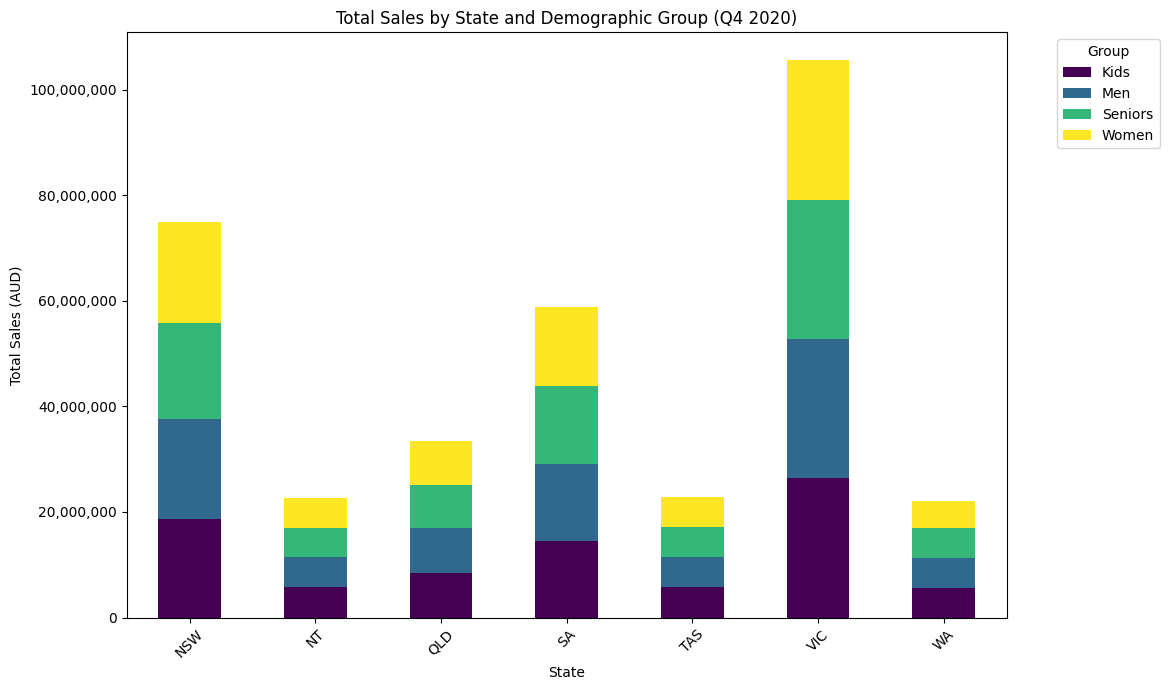

/var/folders/yb/r1p2chyn6dbb3vkddrmlxmxw0000gn/T/ipykernel_98279/1852743061.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 1, 1, 0.98]) # Adjust layout


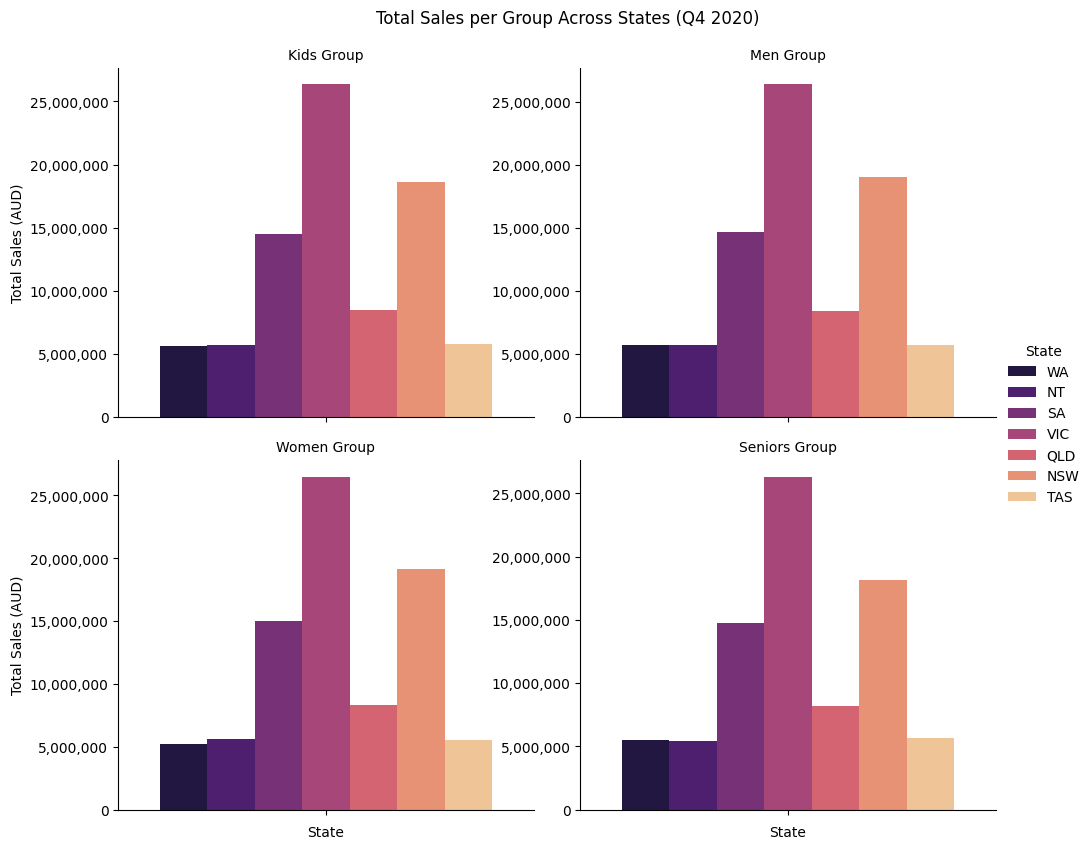

In [12]:
state_group_sales = df.pivot_table(index='State', columns='Group', values='Sales', aggfunc='sum')

print("\nSales Pivot Table (State vs Group):")
print(state_group_sales.map('{:,.0f}'.format)) # Formatted display

# Stacked Bar Chart
ax = state_group_sales.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Total Sales by State and Demographic Group (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

# Faceted Bar Charts (Alternative View) - Sales per Group across States
g = sns.catplot(hue='State', y='Sales', col='Group', data=df, kind='bar', estimator=sum, errorbar=None, # Updated ci to errorbar
                height=4, aspect=1.2, palette='magma', col_wrap=2, sharey=False, legend=True) # col_wrap to arrange plots
g.fig.suptitle('Total Sales per Group Across States (Q4 2020)', y=1.03) # Add overall title
g.set_axis_labels("State", "Total Sales (AUD)")
g.set_xticklabels(rotation=45)
g.set_titles("{col_name} Group")

# Format Y-axis labels
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout(rect=[0, 1, 1, 0.98]) # Adjust layout
plt.show()

3. Time of Day Analysis to identify peak sales time


--- Total Sales Grouped by Time ---
Time
Morning      114207500
Afternoon    114007500
Evening      112087500
Name: Sales, dtype: int64
---------------------------------


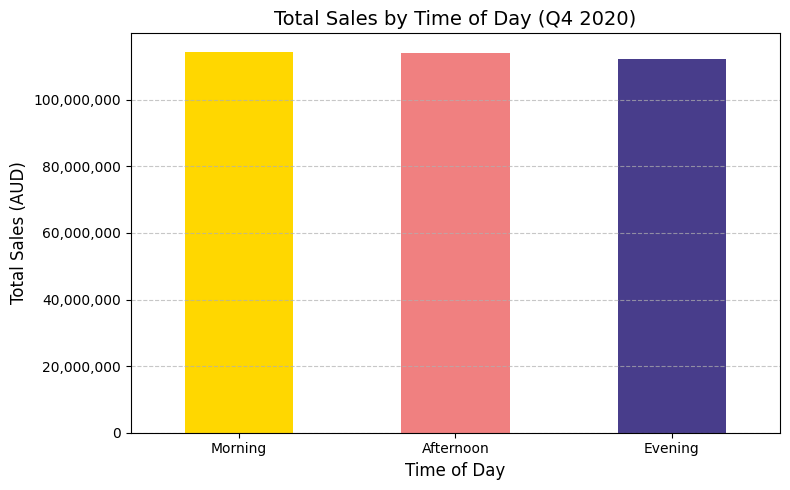

In [13]:
# Group by Time and sum Sales
time_sales_simple = df.groupby('Time')['Sales'].sum()

time_order = ['Morning', 'Afternoon', 'Evening']
time_sales_simple = time_sales_simple.reindex(time_order, fill_value=0)

print("\n--- Total Sales Grouped by Time ---")
print(time_sales_simple)
print("---------------------------------")


# Simple bar chart
plt.figure(figsize=(8, 5))
time_sales_simple.plot(kind='bar', color=['gold', 'lightcoral', 'darkslateblue']) # Use the grouped Series directly
plt.title('Total Sales by Time of Day (Q4 2020)', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Sales (AUD)', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal
plt.ticklabel_format(style='plain', axis='y') # Use plain numbers for y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # Add commas
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout()
plt.show()

A bit hard to tell but Morning and Afternoon are tied for most sales, with evening a bit behind, so Morning and Afternoon are the best time for sales to occur and should be focused on.

## Conclusion & Recommendations

- Looking at the sales figures from late 2020, it's clear that some states and customer groups are doing much better than others for AAL. 
- Victoria (VIC) had the highest sales while Western Australia (WA) had the lowest sales. Although low sales may also be caused by population in those areas, I recommend AAL determine the driving force of sales in that area and focus their efforts in-kind.
- When it comes to who's buying, Men's clothes were the biggest sellers, but Senior's clothes didn't do as well as other groups, which suggests room for improvement there. 
- Finally, mornings and afternoons were tied for peak sales times, and December saw a big jump in sales, likely thanks to the holidays, which gives AAL good pointers on when and where to potentially boost their sales efforts. For example holidays like Valentine's Day, Easter and Christmas can be targeted for promotions.